# Part I - (Ford GoBike System Data Visualization)
## by Meutem Gervis D

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.




## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading our dataset into a pandas dataframe.

In [4]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

#taking a look at our dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Assessing the dataset


In [5]:
#Getting info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#Getting statistic description of our dataset
df.describe()
 

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
#Checking duplicates
df.duplicated().sum()

0

>From the above assessment it shows that we have some few quality issues
>* datatype of start_time and end_time is object instead of datetime 
>* NaN values in member_gender
>* NaN values in member_birth_year
>
>In addition to these we will be removing the following columns as it won't be needed in our analysis:
>* start_station_latitude	
>* start_station_longitude
>* end_station_latitude	
>* end_station_longitude
>* bike_id
>
>We will also create new columns for member_age, weekday and time.


### Data Cleaning

In [8]:
#Make a copy of dataset for cleanong
df_copy = df.copy()

#### Issue 1
>Erroneous datatypes and NaN values.
#### Define:
>We shall convert start_time and end_time to date_time using pandas to_datetime.
>
>We shall also convert, member_birth_year to int.
>
>we shall convert member_gender and user_type to categorical datatype.
#### Code

In [9]:
#changing type to datetime for start_time and end_time
df_copy.start_time = pd.to_datetime(df_copy.start_time)
df_copy.end_time = pd.to_datetime(df_copy.end_time)

#removing NaN in member_gender and member_birth_year
#selecting NaN rows
cond1 = df_copy.member_gender.isnull()
#dropping them
df_copy = df_copy.loc[~cond1, :]

cond2 = df_copy.member_birth_year.isnull()
df_copy = df_copy.loc[~cond2, :]

#changing type of member_birth_year to int64
df_copy.member_birth_year = df_copy.member_birth_year.astype('int64')

#changing member_gender and user type to categorical types

var_dict = {'user_type': ['Subscriber', 'Customer'],
                    'member_gender': ['Male', 'Female', 'Other']}

for var in var_dict:
    c_var = pd.api.types.CategoricalDtype(categories = var_dict[var])
    df_copy[var] = df_copy[var].astype(c_var)


In [10]:
#Check if convertions have been done
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   175147 non-null  float64       
 6   start_station_longitude  175147 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     175147 non-null  float64       
 10  end_station_longitude    175147 non-null  float64       
 11  bike_id                  175147 non-null  int64         
 12  user_type       

In [11]:
#reseting index
df_copy.reset_index(inplace=True, drop = True)

#### Issue 2
>Unnecessary columns
#### Define
>Using the drop function we will drop all columns not necessary for our analysis
#### Code

In [12]:
df_copy.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude','bike_id'], axis=1, inplace=True)

In [13]:
#check drop
df_copy.columns


Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

#### Issue 3
>Create new columns for member_age and weekday
#### Define
>we will create the member_age column by subtracting the member_birth_year from 2019
>
>we will then drop member_birth_year
>
>We will create the weekday column from the start_time column then convert it to an ordered categorical type.
>
>we will create time column from start_time.
#### Code


In [14]:
#create member_age column
df_copy['member_age'] = 2019 - df_copy.member_birth_year

#drop member_birth_year
df_copy.drop(['member_birth_year'], axis=1, inplace=True)

#create weekday column
df_copy['weekday'] = df_copy.start_time.dt.strftime("%A")

#taking a look at the new columns
df_copy.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_gender,bike_share_for_all_trip,member_age,weekday
91830,595,2019-02-15 11:02:06.113,2019-02-15 11:12:02.009,274.0,Oregon St at Adeline St,189.0,Genoa St at 55th St,Subscriber,Male,No,45,Friday
54882,1205,2019-02-21 08:10:51.780,2019-02-21 08:30:57.525,129.0,Harrison St at 20th St,50.0,2nd St at Townsend St,Subscriber,Female,No,33,Thursday
155402,374,2019-02-05 10:40:02.556,2019-02-05 10:46:17.191,134.0,Valencia St at 24th St,109.0,17th St at Valencia St,Subscriber,Female,No,34,Tuesday
146588,746,2019-02-06 12:30:54.578,2019-02-06 12:43:21.221,370.0,Jones St at Post St,368.0,Myrtle St at Polk St,Subscriber,Male,No,39,Wednesday
57142,608,2019-02-20 19:43:47.082,2019-02-20 19:53:56.002,124.0,19th St at Florida St,58.0,Market St at 10th St,Subscriber,Male,No,27,Wednesday


In [15]:
# convert weekday into ordered categorical types
ordinal_var_dict = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict)
df_copy['weekday'] = df_copy['weekday'].astype(ordered_var)

In [16]:
#create time column
df_copy['time'] = df_copy.start_time.dt.hour

#checking info
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175147 entries, 0 to 175146
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   user_type                175147 non-null  category      
 8   member_gender            175147 non-null  category      
 9   bike_share_for_all_trip  175147 non-null  object        
 10  member_age               175147 non-null  int64         
 11  weekday                  175147 non-null  category      
 12  time            

### Storing Data
>We will now save our clean dataset in a csv file called `go_bikes_clean.csv`

In [17]:
df_copy.to_csv('go_bikes_clean.csv', index=False, encoding='utf-8')

### What is the structure of your dataset?

>   The dataset has 175147 entries with 13 features namely;
>- duration sec
>- start time
>- end time
>- start station id
>- start station name
>- end station id
>- end station name
>- user type
>- member gender
>- bike share for all trip
>- member age
>- weekday
>- time
> Of these, member age, weekday and time are additional variables that were derived and isn't part of the original dataset.

### What is/are the main feature(s) of interest in your dataset?

> Our interest here is to understand how customers and subscribers make use of the service in terms of duration, age,gender and frequency of use and most importantly the user's behavior.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Duration of ride, member_gender and age, time and weekdays are some of the key features that will help us better underdstand our customers and subscriber behavior as well as the demographics of the entire dataset.





## Univariate Exploration

> We will start by looking our user distribution.

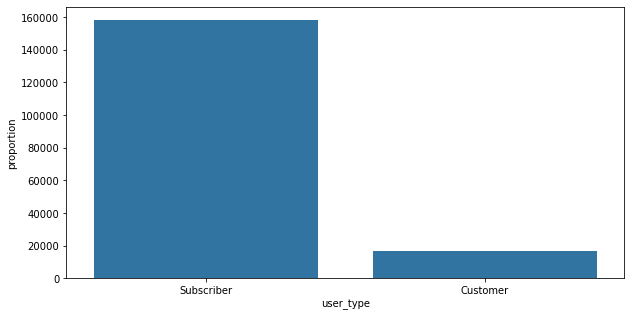

In [18]:
# Generating a master dataframe for our exploration
go_bikes_master = df_copy.copy()

# creating plot
fig, ax = plt.subplots(figsize = (10,5))
base_color = sb.color_palette()[0]
sb.countplot(data = go_bikes_master, x = 'user_type', color = base_color, order = go_bikes_master['user_type'].value_counts().index)
plt.ylabel('proportion');



> From the above it shows most of our users are subscribers. We can further make our visualisation more informative by simply displaying in terms of percentages.

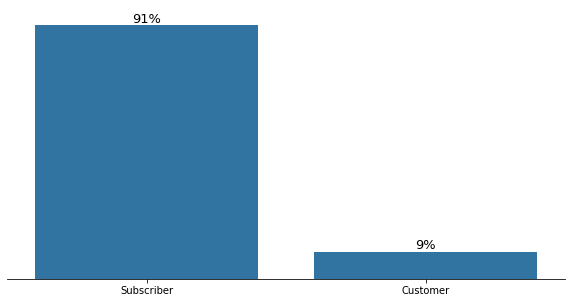

In [19]:
# adding percentages to each bar
fig, ax = plt.subplots(figsize = (10,5))
base_color = sb.color_palette()[0]

sb.countplot(x = "user_type", data = go_bikes_master, 
              order = go_bikes_master['user_type'].value_counts().index,
              color = base_color)

# Calculate % for each user types 
perc_list = []
type_sum = go_bikes_master['user_type'].value_counts().to_list()
total_sum = go_bikes_master.shape[0]
for i in range(0,len(type_sum)):
    percent = int(round(100 * type_sum[i] / total_sum))
    perc_list.append(percent) 
# Annotate bars
i=0
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", color='black', size=13)
    i+=1
plt.ylim([0, 170000])
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlabel("")
sb.despine(fig, left = True);

>So we can see now that 91% of our users have a subscription.
>
>Now we shall look at one of the main feature of interest, duration_sec, which helps describe the behaviour of users

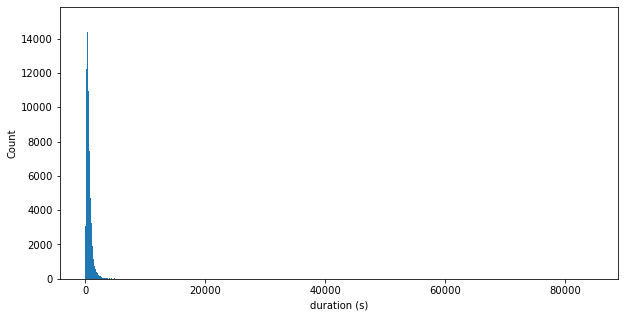

In [20]:
# standard-scaled distribution plot of duration of use

binsize = 60
bins = np.arange(61, go_bikes_master['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = go_bikes_master, x = 'duration_sec', bins = bins)
plt.xlabel('duration (s)')
plt.ylabel('Count')
plt.show()

> The distribution is highly skewed to the right. hence we will use a log scale

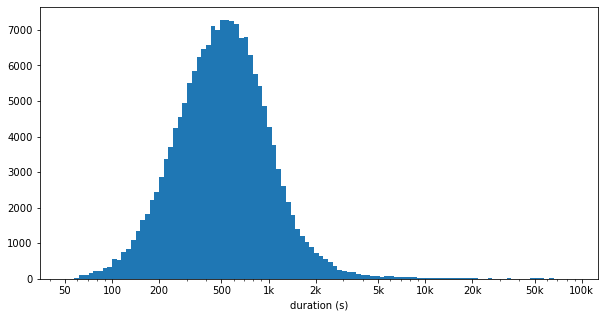

In [21]:
# there is a very long tail in the distribution, so let's put it on a log scale 
log_binsize = 0.03
bins = 10 ** np.arange(1.7, np.log10(go_bikes_master['duration_sec'].max())+log_binsize, log_binsize)
tick = [50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5]
label = [50, 100, 200, 500, '1k', '2k', '5k', '10k', '20k','50k', '100k']

plt.figure(figsize=[10, 5])
plt.hist(data = go_bikes_master, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(tick, label)
plt.xlabel('duration (s)')
plt.show()

> Usage duration has a unimodal distribution, with mode laying between 400 and 700 seconds, and most trips lasting from 120 seconds to 2000 seconds. number of users drop sharply above 2000 seconds.

> Let us now look at the gender distribution to know which gender uses the service more

In [22]:
# Compute proportion
gender_sum = go_bikes_master['member_gender'].value_counts().sum()
gender_counts = go_bikes_master['member_gender'].value_counts()
max_gend_count = gender_counts[0]
max_prop = max_gend_count/gender_sum

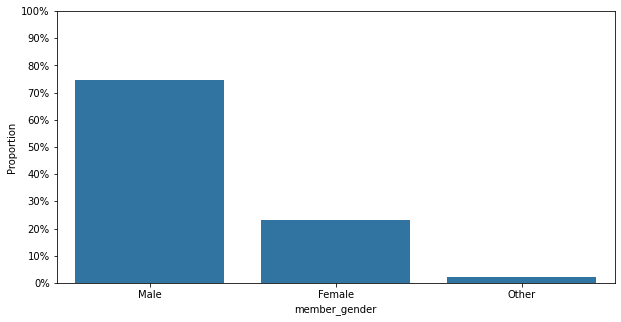

In [23]:
# establish tick locations and create plot
fig, ax = plt.subplots(figsize = (10,5))
tick_props = np.arange(0, max_prop +0.3, 0.1)
tick_names = [f'{int(v*100)}%' for v in tick_props]
ax = sb.countplot(data = go_bikes_master, x = 'member_gender', color = base_color)
plt.yticks(tick_props * gender_sum, tick_names)
plt.ylabel('Proportion');

>From the above visualisation, we see that about 75% of the users are males, about 23% are females and about 2% are others.
>
>Now we shall check the age distribution, people of what age mostly use the service?

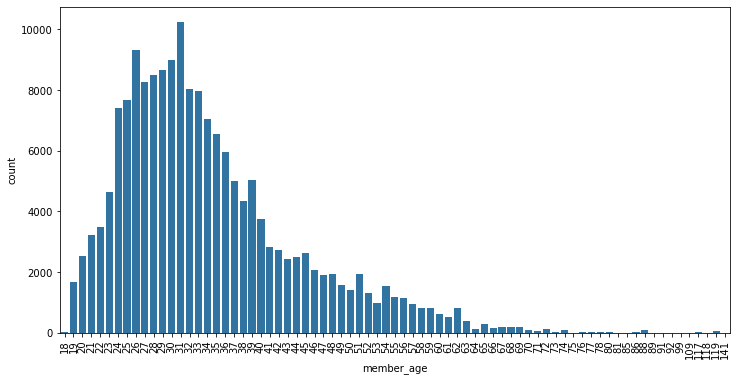

In [24]:
# count plot of member_age
plt.figure(figsize=[12,6])

sb.countplot(data = go_bikes_master, x = 'member_age', color = base_color)
plt.xticks(rotation=90)

plt.show()

>From the above distributions it shows that the majority of users are between the ages of 24 - 35.
also we can see that there are records for people above 80 years, we shall consider these as outliers.
>
>We shall now look at the time of the day and day distribution, when do users mostly make use of the service? 

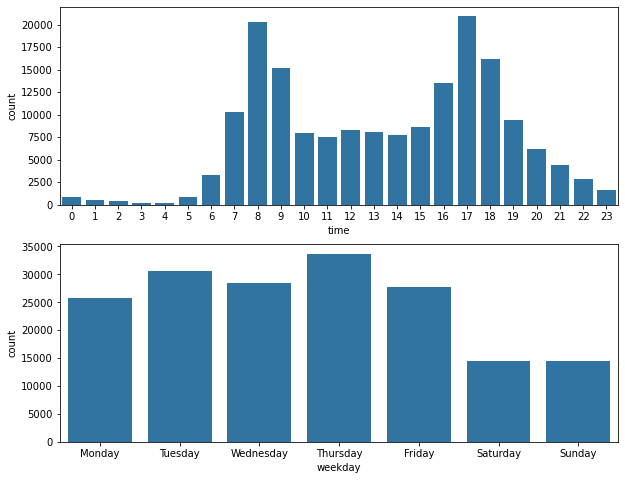

In [25]:
fig, ax = plt.subplots(nrows=2, figsize = [10, 8])

ax1 = sb.countplot(data = go_bikes_master, x = 'time', color = base_color, ax = ax[0])
sb.countplot(data = go_bikes_master, x = 'weekday', color = base_color, ax = ax[1])

plt.show()

>From the above it is clear the services is mostly use during the weekdays than weekends with thursday having the highest record. in addition, 8AM and 5PM also show a high number of use at that time. and the service is been made use of more at the hours of 7-9 in the morning and 4-7 in the evening.
>
> We will now correct some minor issues in our variables of interest, such as removing outliers and also correcting the datatype.
>- We will only consider data for members below the age of 80.
>- we will chage time to categorical datatype.

In [26]:
# selecting member_age below 80
go_bikes_master= go_bikes_master[go_bikes_master.member_age <= 80]

#transform time in part of the day
b = [0,4,8,12,13,18,20,22]
l = ['Late Night','Early Morning','Morning','Noon','Afternoon','Evening','Night']
go_bikes_master['time'] = pd.cut(go_bikes_master['time'], bins=b, labels=l, include_lowest=True)

In [27]:
#check transformation
go_bikes_master.time.value_counts()

Afternoon        66799
Morning          38870
Early Morning    34619
Evening          15645
Noon              8092
Night             7193
Late Night        2164
Name: time, dtype: int64

In [28]:
#changing datatype of time to categorical
go_bikes_master.time = go_bikes_master.time.astype('category')

In [29]:
#checking changes
go_bikes_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174955 entries, 0 to 175146
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174955 non-null  int64         
 1   start_time               174955 non-null  datetime64[ns]
 2   end_time                 174955 non-null  datetime64[ns]
 3   start_station_id         174760 non-null  float64       
 4   start_station_name       174760 non-null  object        
 5   end_station_id           174760 non-null  float64       
 6   end_station_name         174760 non-null  object        
 7   user_type                174955 non-null  category      
 8   member_gender            174955 non-null  category      
 9   bike_share_for_all_trip  174955 non-null  object        
 10  member_age               174955 non-null  int64         
 11  weekday                  174955 non-null  category      
 12  time            

In [30]:
#Storing new dataset for further use in part 2
go_bikes_master.to_csv('master.csv', index=False, encoding='utf-8')

>We will now look at the time distributions given our new adjustment.

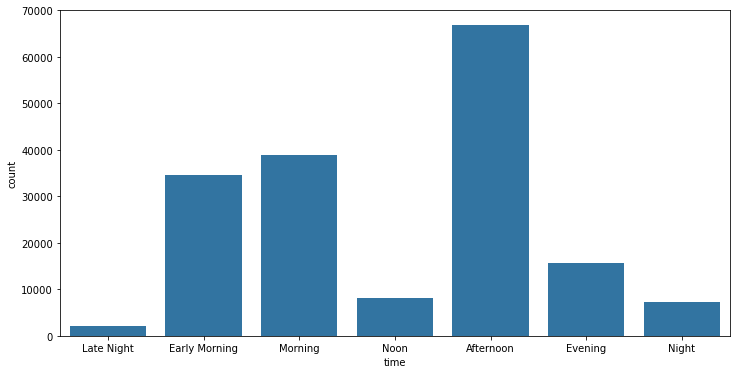

In [31]:
plt.figure(figsize=[12,6])

sb.countplot(data = go_bikes_master, x = 'time', color = base_color)

plt.show()



>From the above we clearly see that a greater majority make use of the service in the afternoon.

In [32]:
# reset index after selecting and slicing the data to reduce errors later on
go_bikes_master.reset_index(drop=True, inplace=True)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
>First the majority of users are subscribers(91%).
>
>Duration took a large range of values,so a log transformation was used for the data.
>
> The variable age have some outliers. In order to allow the plots to show the trends clearly, we have removed them from our dataset. The outliers could be caused by incorrect data entry.

The duration variable has a large range, we plot it on a log scale to examine it. Under the log transformation, we observed a unimodal distribution.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> the time variable has been categorised into the periods in a day in other to better comprehen the distribution of this variable.
>
>Also the member age variables was trimmed in other to get rid of outliers.

## Bivariate Exploration

> We will begin by looking at the correlation between variables.

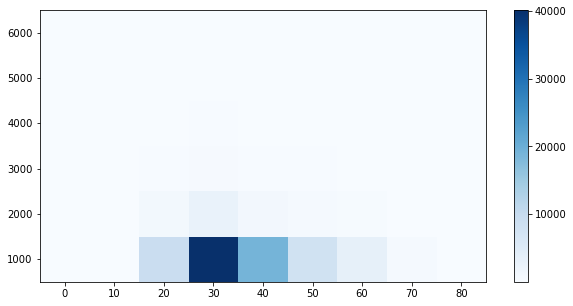

In [33]:
#use a heat map to depict the relationship between duration and age.
plt.figure(figsize=[10,5])
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d(data = go_bikes_master, x = 'member_age', y='duration_sec',
           bins = [bins_x, bins_y], cmap ='Blues')
plt.colorbar(ticks=[1e4, 2e4, 3e4, 4e4])
plt.show()

> The relationship between the two variables is negative. Visualization shows that the longest trips were made by people aged 25 to 35 years. As we already know, this age group is the most popular among users.
>
>Let's look at the relationship between the numeric variables - duration of the trip and categorical variables - user type

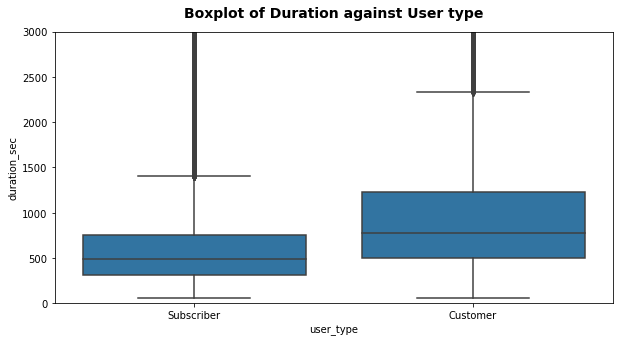

In [34]:
fig, ax = plt.subplots(figsize = (10,5))
sb.boxplot(data=go_bikes_master, x='user_type', y='duration_sec', color=base_color)
plt.ylim([0, 3e3])
plt.title('Boxplot of Duration against User type', y=1.03, fontsize=14, fontweight='semibold')
plt.show()

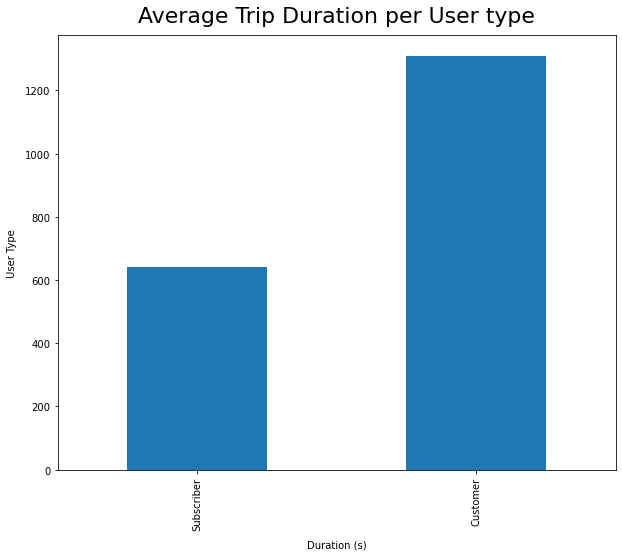

In [35]:
#let's create bar chart with the average duration of trips
ax = go_bikes_master.groupby('user_type')['duration_sec'].mean().plot(kind='bar', figsize=(10,8))
ax.set_title('Average Trip Duration per User type', fontsize=22, y=1.015)
ax.set_ylabel('User Type', labelpad=8)
ax.set_xlabel('Duration (s)', labelpad=10);

>The above visualization shows that on average, customers took longer duration trips
>
>Let's now look at the relationship between members age and user type.

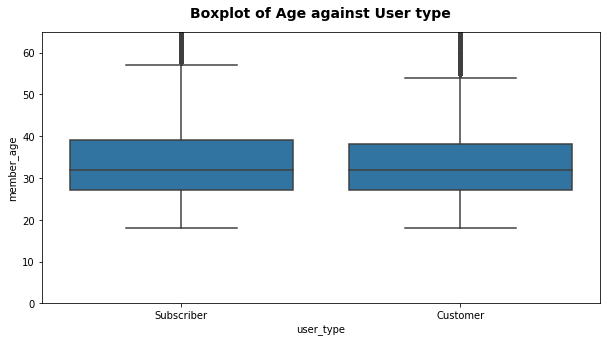

In [36]:
fig, ax = plt.subplots(figsize = (10,5))
sb.boxplot(data=go_bikes_master, x='user_type', y='member_age', color=base_color)
plt.ylim([0, 65])
plt.title('Boxplot of Age against User type', y=1.03, fontsize=14, fontweight='semibold')
plt.show()

>Both user groups seem to have a similar age distribution with a mean around 32 years.
>
>We will now see how the Users make use of the service during days of the week.

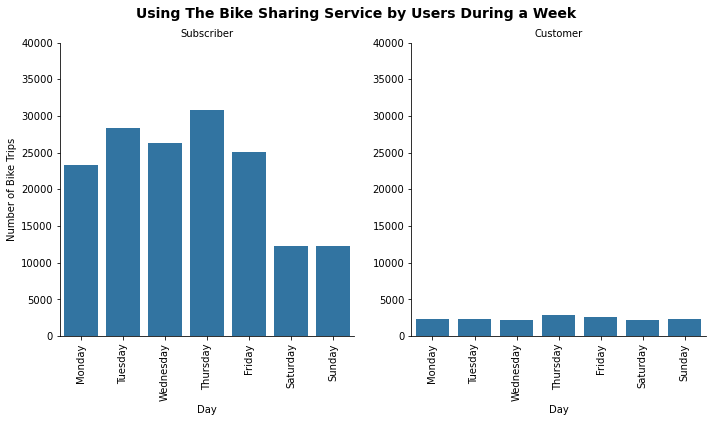

In [42]:
#let's plot the difference in the use of the service during the week

#Barplot fuction for plotting variabkles for various user types
def barplot(xaxis,xlabel,gtitle):
    g = sb.catplot(data=go_bikes_master, x=xaxis, col='user_type', kind='count', sharex = True, sharey = False,
            color = base_color)

    g.set_axis_labels(xlabel, 'Number of Bike Trips')

    g.set_titles("{col_name}")

    g.fig.suptitle(gtitle, 
               y=1.03, fontsize=14, fontweight='semibold')

    g.set_xticklabels(rotation=90)

    g.set(ylim=(0, 4e4));

    
barplot('weekday','Day','Using The Bike Sharing Service by Users During a Week')

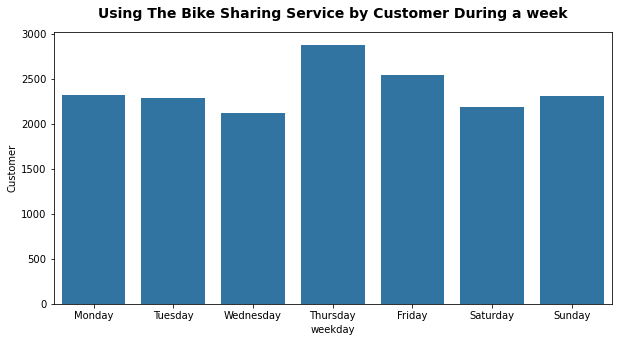

In [35]:
#Getting a closer look at the customer distribution
n_time_cust = go_bikes_master.groupby(['weekday', 'user_type']).size()
n_time_cust = n_time_cust.reset_index(name='count')
n_time_cust = n_time_cust.pivot(index = 'weekday', columns = 'user_type', values = 'count')
n_time_cust=n_time_cust.reset_index()

plt.figure(figsize = (10,5))
sb.barplot(data=n_time_cust, x='weekday', y='Customer', color=base_color)
plt.title('Using The Bike Sharing Service by Customer During a week', 
               y=1.03, fontsize=14, fontweight='semibold')
plt.show()

>Subscribers most often used the service on working days, in contrast to customers who used the service throughout  a week. Interestingly, both groups used the service most on Thursday.
>
>We will now look at the how users use the service during a day.

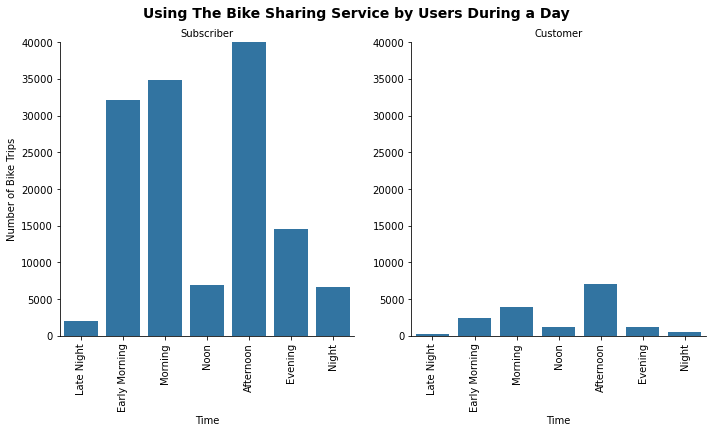

In [44]:
#let's plot the difference in the use of the service during the day
barplot('time','Time','Using The Bike Sharing Service by Users During a Day')

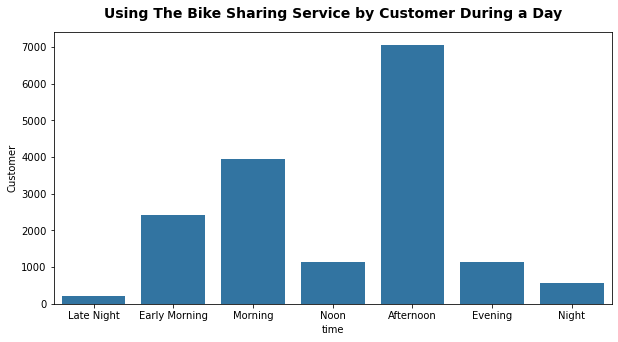

In [159]:
#Getting a closer look at the customer distribution
n_time_cust = go_bikes_master.groupby(['time', 'user_type']).size()
n_time_cust = n_time_cust.reset_index(name='count')
n_time_cust = n_time_cust.pivot(index = 'time', columns = 'user_type', values = 'count')
n_time_cust=n_time_cust.reset_index()

plt.figure(figsize = (10,5))
sb.barplot(data=n_time_cust, x='time', y='Customer', color=base_color)
plt.title('Using The Bike Sharing Service by Customer During a Day', 
               y=1.03, fontsize=14, fontweight='semibold')
plt.show()

>As we already know, subscribers exceed the number of non-subscribers users, as we can see in the graphs above. Both groups mostly use the services in the afternoon, very few use it at late nights.
>
>Now let's explore user type by gender

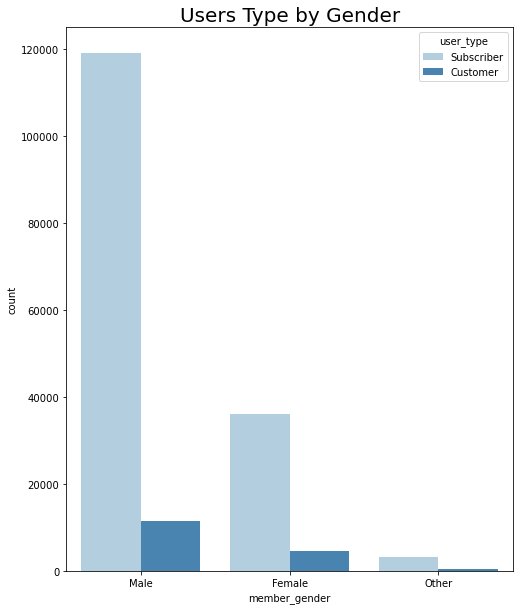

In [160]:
plt.figure(figsize = [8, 10])
sb.countplot(data = go_bikes_master, x = 'member_gender', hue = 'user_type', palette = 'Blues')
plt.title('Users Type by Gender', fontsize= 20)
plt.show()

>For all user types, the majority are subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Customers use the service for longer duration than subscribers. Perhaps subscribers use them more during week days possibly for daily activities like work. Also they two grtoups mostly use tghe service in the afternoon and thursday has an overall higest record of usage for both user groups.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> People between the ages of 25-35 took the longest trips for both groups

## Multivariate Exploration

> In this section we will futher analyse the impact of the user type and age on the the relationship between duration and time.
>
>We will focus on the age group which is more popular thaat is between 20 and 50.

In [161]:
# select dataset for member aged between 20 to 50
df_flag = ((go_bikes_master['member_age'] >= 20) & (go_bikes_master['member_age'] <= 50))
df_plot = go_bikes_master.loc[df_flag,:]

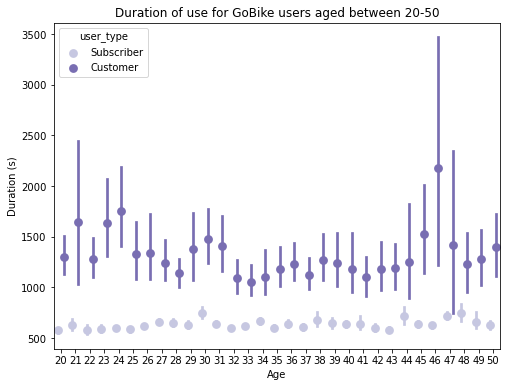

In [162]:
# setting the figure size
fig = plt.figure(figsize = [8,6])
# point plot of age against duration with user_type
ax = sb.pointplot(data = df_plot, x = 'member_age', y = 'duration_sec', hue = 'user_type',
                  palette = 'Purples', linestyles = '', dodge = 0.4)
plt.title('Duration of use for GoBike users aged between 20-50')
plt.ylabel('Duration (s)')
plt.xlabel('Age')
ax.set_yticklabels([],minor = True)
plt.show();

>A point plot to illustrate differences between user behaviour of customer and subscriber over the selected age group.
>
>We can see that age does not play a big factor in determining the usage duration of GoBike. Instead, there is a significant differnce in the usage duration between subscriber and customer. Subscriber generally uses GoBike for shorter distance and duration whereas customer uses GoBike for duration.

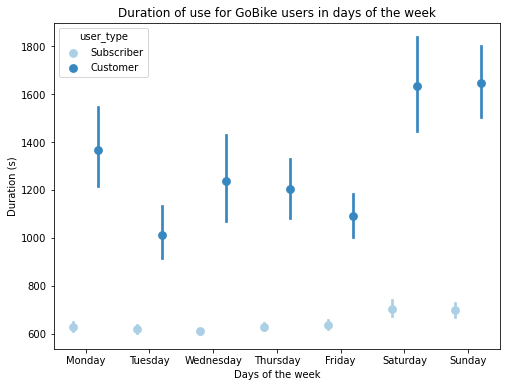

In [163]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_plot, x = 'weekday', y = 'duration_sec', hue = 'user_type',
                  palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Duration of use for GoBike users in days of the week')
plt.ylabel('Duration (s)')
plt.xlabel('Days of the week')
ax.set_yticklabels([],minor = True)
plt.show();

>Point plot to show different behaviours throughout the week for subscribers and customers.
>
>Interesting observation that the duration of GoBike usage increases over the weekend for both subscriber and customer. This indicates that users generally uses GoBike for non-commute transportation purposes.





### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Multivariate charts have strengthened the previously observed relationships. Subscribers most often used the service on weekdays (especially in the afternoon), and customers took trips for longer durations. It was almost unaffected by gender.

### Were there any interesting or surprising interactions between features?

> The duration of trips was longer on weekends.

## Conclusions
>1. Most users of Ford GoBike service are subscribers (91%);


>2. The majority of users are men both among subscribers and customers;


>3. The majority of users are people between the ages of 25 and 35, both among subscribers and customers;


>4. Subscribers mostly use the service during the working week, especially in the afternoon, while customers use the service throughout the week,and for longer durations. On weekends, the overall duration of trips are longer. Perhaps subscribers used the service to travel to work or at work, and customers for entertainment. It is worth noting that the trips of customers on average lasted much longer.